# Необходимые библиотеки

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=4e42afea99e54b8f1ffba2b06930c8c34ab0956d8e9d07739450c4e6c60a54e9
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# core libraries
import numpy as np
import pandas as pd

# data downloading
import yfinance as yf

# visualization
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
import plotly

# statistics
import scipy.stats as sps

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Загрузка данных

In [ ]:
with open('drive/MyDrive/data/filename.txt') as file:
  tickers_new = file.read().split()

Загружаем данные о тикерах акций.

In [ ]:
tickers = pd.read_excel("drive/MyDrive/data/Spain_stocks_2017.xlsx")
tickers

,Category,Ticker
0,Money Center Banks,BBVA.MC
1,General Contractors,ANA.MC
2,Information Technology Services,AMS.MC
3,General Contractors,ABE.MC
4,Money Center Banks,SAN.MC
...,...,...
194,NaN,27447617.MC
195,Medical Instruments & Supplies,FAE.MC
196,NaN,TLGO.MC
197,Paper & Paper Products,RDM.MC


In [ ]:
len(list(set(tickers.Ticker) | set(tickers_new)))

283

Скачиваем данные об акциях.

In [ ]:
data = yf.download(list(set(tickers.Ticker) | set(tickers_new)),'2019-01-01','2020-01-01')

[*********************100%***********************]  283 of 283 completed

111 Failed downloads:
- SCY-D.MC: No data found, symbol may be delisted
- IKM.MC: No data found, symbol may be delisted
- RLI-D.MC: No data found, symbol may be delisted
- IBE-D.MC: No data found, symbol may be delisted
- ONL.MC: No data found, symbol may be delisted
- REP-D.MC: No data found, symbol may be delisted
- 480S.MC: Data doesn't exist for startDate = 1546300800, endDate = 1577836800
- YOSO.MC: No data found, symbol may be delisted
- YPMR.MC: No data found, symbol may be delisted
- INY.MC: No data found for this date range, symbol may be delisted
- TST.MC: No data found for this date range, symbol may be delisted
- LDA.MC: Data doesn't exist for startDate = 1546300800, endDate = 1577836800
- 27447617.MC: No data found, symbol may be delisted
- HIS.MC: No data found, symbol may be delisted
- MAS.MC: No data found, symbol may be delisted
- YAML.MC: Data doesn't exist for startDate = 1546300800, endDate = 

Скачиваем данные индекса.

In [ ]:
indx = yf.download('^IBEX', '2019-01-01','2020-01-01')['Close']
indx

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    8550.000000
2019-01-03    8523.299805
2019-01-04    8737.799805
2019-01-07    8776.299805
2019-01-08    8847.299805
                 ...     
2019-12-23    9659.599609
2019-12-24    9661.799805
2019-12-27    9700.500000
2019-12-30    9612.599609
2019-12-31    9549.200195
Name: Close, Length: 255, dtype: float64

Получаем значения цены закрытия и объемов продаж.

In [ ]:
df = data['Close']
df_volume = data['Volume']
df

,10641067.MA,27447617.MC,480S.MC,A3M.MC,ABB.MC,ABE.MC,ABG-P.MC,ABG.MC,ACS-D.MC,ACS.MC,ACX.MC,ADL.MC,ADV.MC,ADX.MC,ADZ.MC,AEDAS.MC,AENA.MC,AGIL.MC,AGS.MC,AI.MC,AIR.MC,AISA.MC,ALB.MC,ALC.MC,ALM.MC,ALNT.MC,ALQ.MC,AMEN.MC,AMP.MC,AMS.MC,ANA.MC,ANE.MC,APAM.MC,APPS.MC,ARM.MC,ART.MC,ATRY.MC,AXIA.MC,AZK.MC,BAIN.MC,...,XEKT.MC,XELTO.MC,XGGB.MC,XPBR.MC,XPBRA.MC,XTZA.MC,XUSI.MC,XUSIO.MC,XVALO.MC,YABA.MC,YAC1.MC,YADR.MC,YADV.MC,YAI1.MC,YAML.MC,YARE.MC,YATO.MC,YCPS.MC,YDOA.MC,YEIS.MC,YENT.MC,YFID.MC,YHAB.MC,YHCR.MC,YMEI.MC,YMPI.MC,YMRE.MC,YOSO.MC,YP3L.MC,YPMR.MC,YPR2.MC,YPR3.MC,YTRA.MC,YVBA.MC,YVCP.MC,YVIT.MC,YZBL.MC,YZPS.MC,ZNK.MC,ZOT.MC
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,4.350,NaN,NaN,0.0037,0.0159,NaN,33.240002,8.582,1.63,NaN,1.400,6.90,22.040001,137.000000,1.46,NaN,0.1436,85.000000,NaN,41.150002,19.000000,13.154044,13.95,5.75,NaN,0.2550,61.439999,74.800003,NaN,22.420000,9.200,9.0,NaN,2.80,NaN,6.78,4.00,...,41.200001,5.557554,3.40,5.80,5.10,0.1060,NaN,2.64,11.5,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.83,NaN,NaN,NaN,32.799999,NaN,NaN,NaN,NaN,NaN,0.92,0.910,12.40,13.4,NaN,14.3,1.21,25.4,0.53,6.250
2019-01-03,NaN,NaN,NaN,4.278,NaN,NaN,0.0042,0.0170,NaN,33.320000,8.406,1.78,NaN,1.535,6.90,21.719999,137.050003,1.46,NaN,0.1426,81.199997,NaN,40.650002,19.000000,13.340001,13.95,5.75,NaN,0.2594,58.060001,76.339996,NaN,23.059999,9.140,9.0,NaN,2.82,NaN,6.80,3.72,...,42.200001,6.971318,3.40,6.25,5.65,0.1050,NaN,2.64,11.4,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.83,NaN,NaN,NaN,32.799999,NaN,NaN,NaN,NaN,NaN,0.92,0.910,12.00,13.4,NaN,14.3,1.21,25.4,0.53,6.135
2019-01-04,NaN,NaN,NaN,4.350,NaN,NaN,0.0042,0.0172,NaN,33.820000,8.882,1.80,NaN,1.800,6.98,22.059999,140.500000,1.46,NaN,0.1620,85.029999,NaN,41.950001,19.000000,13.496597,14.40,5.75,NaN,0.2650,60.060001,76.620003,NaN,24.150000,9.250,9.0,NaN,2.84,NaN,6.74,3.72,...,42.400002,7.020068,3.62,6.35,5.75,0.1080,NaN,2.64,12.1,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.83,NaN,NaN,NaN,32.799999,NaN,NaN,NaN,NaN,NaN,0.92,0.910,11.80,13.4,NaN,14.3,1.21,25.4,0.54,6.270
2019-01-07,NaN,NaN,NaN,4.430,NaN,NaN,0.0040,0.0169,NaN,33.930000,8.976,1.84,NaN,2.210,7.08,22.340000,139.149994,1.46,NaN,0.1668,83.139999,NaN,41.299999,19.000000,13.555320,14.10,5.75,NaN,0.2620,60.619999,77.139999,NaN,24.469999,9.445,9.0,NaN,2.88,NaN,6.74,3.72,...,44.000000,7.020068,3.64,6.55,5.80,0.1080,NaN,2.64,12.2,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.83,NaN,NaN,NaN,32.799999,NaN,NaN,NaN,NaN,NaN,0.92,0.925,11.80,13.4,NaN,14.3,1.21,25.4,0.54,6.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.57,NaN
2019-12-27,NaN,NaN,NaN,3.522,NaN,NaN,0.0094,0.0188,NaN,35.189999,9.974,2.08,NaN,2.028,6.98,20.600000,175.050003,4.10,NaN,0.0794,133.020004,NaN,48.650002,21.000000,14.573193,15.50,5.85,NaN,0.2830,73.639999,94.500000,NaN,28.650000,11.460,11.4,NaN,5.10,NaN,6.72,3.04,...,66.500000,8.100000,4.38,7.20,6.70,0.0350,NaN,2.08,11.8,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.79,NaN,NaN,NaN,37.400002,NaN,NaN,NaN,NaN,NaN,0.76,0.690,

# Анализ пропущенных значений

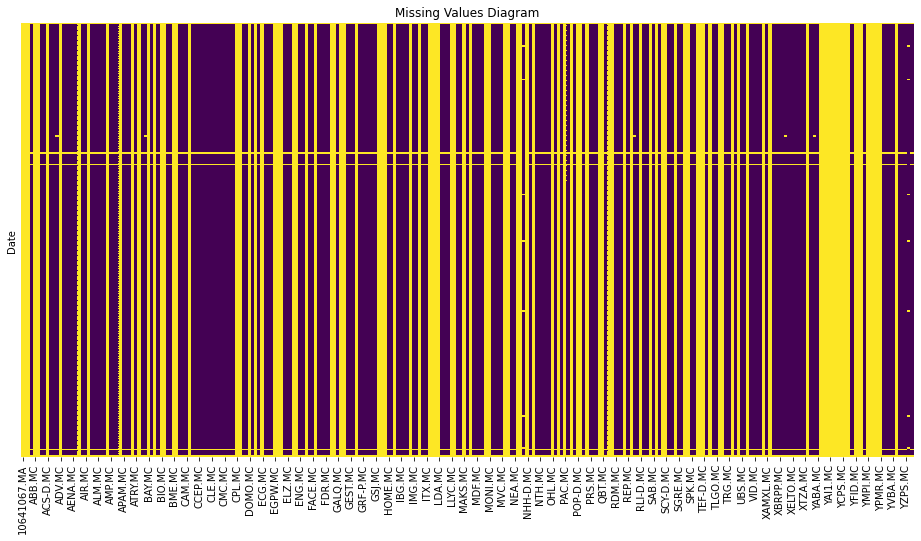

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Missing Values Diagram')
ax = sns.heatmap((df.isna()), cbar=False,yticklabels=False,cmap = 'viridis');

for item in ax.get_xticklabels():
    item.set_rotation(90)

**Замечание:** Можно видеть, что многие из скачанных акций содержат большое число пропусков. Установим порог числа пропущенных значений примерно 0.25.

In [ ]:
df_cleaned = df.dropna(how='all').dropna(axis=1, thresh=int(df.shape[0]*0.26))
df.shape[1], df_cleaned.shape[1]

(283, 172)

Можно видеть, что довольно большое количество данных об акциях содержало более 25 процентов пропусков. 

Рассмотрим данные после очистки.

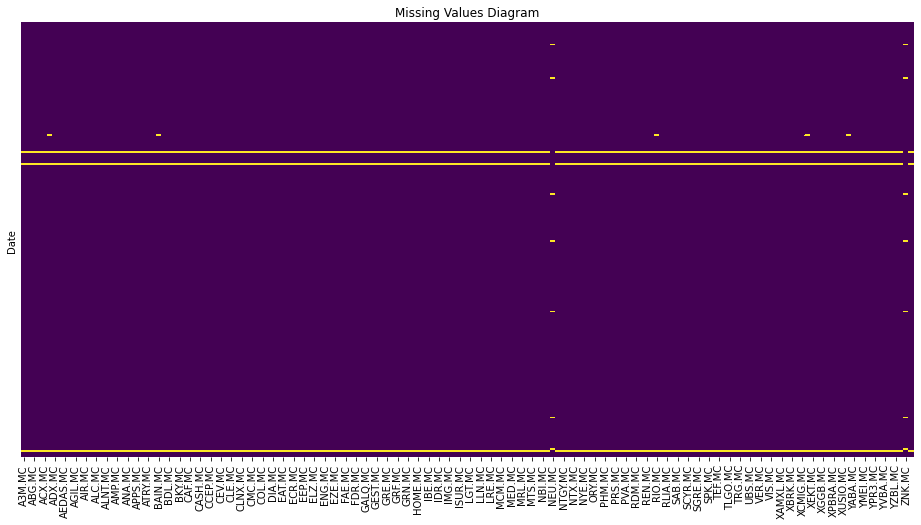

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Missing Values Diagram')
ax = sns.heatmap((df_cleaned.isna()), cbar=False, yticklabels=False, cmap = 'viridis');

for item in ax.get_xticklabels():
    item.set_rotation(90)

In [ ]:
df_cleaned.shape

(259, 172)

In [ ]:
((df_cleaned.isna())).mean().sort_values(ascending=False)

ZNK.MC      0.027027
NEU.MC      0.027027
XVALO.MC    0.015444
RIO.MC      0.015444
ADL.MC      0.015444
              ...   
PANG.MC     0.011583
ORY.MC      0.011583
OLE.MC      0.011583
NYE.MC      0.011583
A3M.MC      0.011583
Length: 172, dtype: float64

# Логарифмическая доходность

Для дальнейшего анализа нам необходимо посчитать логарифмическую доходность акций. Кроме того, также посчитаем доходность индекса IBEX 35.

In [ ]:
log_ret = np.log((df_cleaned/df_cleaned.shift(1)).dropna(how='all'))
index_logret = np.log((indx/indx.shift(1)).dropna(how='all'))
log_ret.head()

,A3M.MC,ABG-P.MC,ABG.MC,ACS.MC,ACX.MC,ADL.MC,ADX.MC,ADZ.MC,AEDAS.MC,AENA.MC,AGIL.MC,AI.MC,AIR.MC,ALB.MC,ALC.MC,ALM.MC,ALNT.MC,ALQ.MC,AMP.MC,AMS.MC,ANA.MC,APAM.MC,APPS.MC,ARM.MC,ATRY.MC,AZK.MC,BAIN.MC,BBVA.MC,BDL.MC,BKT.MC,BKY.MC,CABK.MC,CAF.MC,CAM.MC,CASH.MC,CBAV.MC,CCEP.MC,CDR.MC,CEV.MC,CIE.MC,...,SPK.MC,SPS.MC,TEF.MC,TL5.MC,TLGO.MC,TRE.MC,TRG.MC,TUB.MC,UBS.MC,UNI.MC,VER.MC,VID.MC,VIS.MC,VOC.MC,XAMXL.MC,XBBDC.MC,XBRK.MC,XBRPP.MC,XCMIG.MC,XCOP.MC,XEKT.MC,XELTO.MC,XGGB.MC,XPBR.MC,XPBRA.MC,XTZA.MC,XUSIO.MC,XVALO.MC,YABA.MC,YENT.MC,YMEI.MC,YPR2.MC,YPR3.MC,YTRA.MC,YVBA.MC,YVIT.MC,YZBL.MC,YZPS.MC,ZNK.MC,ZOT.MC
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-03 00:00:00,-0.016690,0.126752,0.066894,0.002404,-0.020721,0.088033,0.092058,0.000000,-0.014626,0.000365,0.0,-0.006988,-0.045736,-0.012225,0.000000,0.014038,0.000000,0.0,0.017108,-0.056584,0.020379,0.028146,-0.006543,0.000000,0.007117,0.002946,-0.072571,0.002677,0.004577,-0.005459,0.109518,-0.000639,-0.013793,0.0,0.042122,0.003752,0.009965,0.002920,0.0,-0.023754,...,0.014538,0.188271,0.016472,-0.003945,0.009407,-0.012934,0.084104,-0.025872,0.126752,-0.010573,0.196710,0.012089,-0.003000,0.000000,0.008032,0.054959,0.0,0.007326,-0.006154,0.000000,0.023982,0.226646,0.000000,0.074724,0.102415,-0.009479,0.0,-0.008734,0.0,0.0,0.0,0.0,0.000000,-0.032790,0.0,0.000000,0.0,0.0,0.000000,-0.018571
2019-01-04 00:00:00,0.016690,0.000000,0.011696,0.014895,0.055081,0.011173,0.159256,0.011527,0.015533,0.024862,0.0,0.127553,0.046089,0.031480,0.000000,0.011670,0.031749,0.0,0.021358,0.033867,0.003661,0.046185,0.011963,0.000000,0.007067,-0.008863,0.000000,0.036639,0.000000,0.030641,0.412357,0.037657,-0.008368,0.0,0.004016,0.007463,-0.025102,-0.011730,0.0,0.059719,...,0.045348,-0.056660,0.012932,0.014979,0.020390,0.033194,-0.020372,0.025872,0.023531,0.024498,-0.024098,0.001334,0.017865,0.000000,0.031499,0.021165,0.0,0.007273,0.012270,0.027588,0.004728,0.006969,0.062699,0.015873,0.017544,0.028171,0.0,0.059592,0.0,0.0,0.0,0.0,0.000000,-0.016807,0.0,0.000000,0.0,0.0,0.018692,0.021766
2019-01-07 00:00:00,0.018224,-0.048790,-0.017596,0.003247,0.010528,0.021979,0.205206,0.014225,0.012613,-0.009655,0.0,0.029199,-0.022478,-0.015616,0.000000,0.004341,-0.021053,0.0,-0.011385,0.009281,0.006764,0.013163,0.020862,0.000000,0.013986,0.000000,0.000000,-0.003511,-0.004577,-0.000559,-0.059423,0.005835,0.009756,0.0,-0.010071,-0.003724,0.007597,0.102258,0.0,-0.010929,...,0.033902,-0.040028,0.009006,0.036153,0.000000,-0.001400,0.040338,0.025220,0.000000,0.000000,0.024098,0.022414,0.003367,-0.018018,0.000000,0.000000,0.0,0.076693,-0.056441,0.000000,0.037041,0.000000,0.005510,0.031010,0.008658,0.000000,0.0,0.008230,0.0,0.0,0.0,0.0,0.016349,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.003185
2019-01-08 00:00:00,-0.000903,0.048790,0.023393,0.010262,0.024649,0.032088,-0.009091,-0.025752,-0.002689,0.006090,0.0,-0.035391,0.055219,0.016807,-0.005277,0.049306,-0.021506,0.0,0.011385,0.025087,0.014159,0.026614,0.058099,0.011050,-0.006969,-0.002972,0.000000,0.008447,0.000000,0.011397,-0.032596,0.001835,0.012405,0.0,0.034323,0.022141,0.016513,0.037888,0.0,0.027993,...,0.000000,-0.010557,-0.001560,-0.004105,-0.014788,0.021258,-0.029501,-0.001917,-0.023531,0.001727,0.011834,-0.014445,0.019555,0.000000,0.007722,0.000000,0.0,0.000000,0.000000,0.000000,0.022473,-0.013986,0.000000,0.000000,0.000000,-0.037740,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,-0.007018,0.0,0.0,0.000000,0.052644
2019-01-09 00:00:00,0.048080,-0.024098,0.000000,0.008713,0.017456,0.051293,0.049008,-0.020499,-0.012647,-0.010772,0.0,-0.025159,0.020949,0.000000,0.000000,0.017036,0.010811,0.0,0.041395,0.004494,-0.007698,0.018921,-0.003503,-0.006615,-0.035591,0.008889,0.000000,0.013449,0.000000,-0.021512,0.094762,-0.007978,0.008186,0.0,0.002442,0.000000,0.000000,-0.012903,0.0,0.028097,...,0.004751,0.031343,-0.020644,0.018679,-0.009355,0.050813,0.054760,0.072187,0.000000,-0.026225,0.034686,0.019647,0.004522,0.000000,0.030305,0

# Карта активов

Изобразим активы на графике с осями доходности и риска. Отметим красным портфель с равными долями капитала, а синей звездой - индекс биржи.

In [ ]:
def plot_stocks_map(returns, mean_portfolio=True, index=False, index_ret=None, special=None):
  plt.figure(figsize=(16, 9))
  plt.title('Stocks Map')

  # подсчет доходностей и стандартных отклонений для акций
  mean_rets = returns.mean()
  std_rets = returns.std()

  # визуализация параметров акций
  ax = sns.scatterplot(x=std_rets, y=mean_rets);

  if mean_portfolio:

    # подсчет показателей портфеля
    n = returns.shape[1]
    r = [1/n for i in range(n)]
    cov = returns.cov()
    portf_mean = returns.mean(axis=1).mean()
    portf_std = np.sqrt(np.matmul(np.matmul(r, cov.values), r))

    # визуализация параметров портфеля
    plt.scatter(x=portf_std, y=portf_mean, c='r', marker='o', linewidths=5)

  if special:
    plt.scatter(x=returns[special].std(), y=returns[special].mean(), c='g', marker='o', linewidths=3)

  if index:
    # подсчет и визуализация показателей индекса
    plt.scatter(x=index_ret.std(), y=index_ret.mean(), c='b', marker='*', linewidths=5)


  ax.grid()
  ax.set_xlabel('Risk')
  ax.set_ylabel('Return')

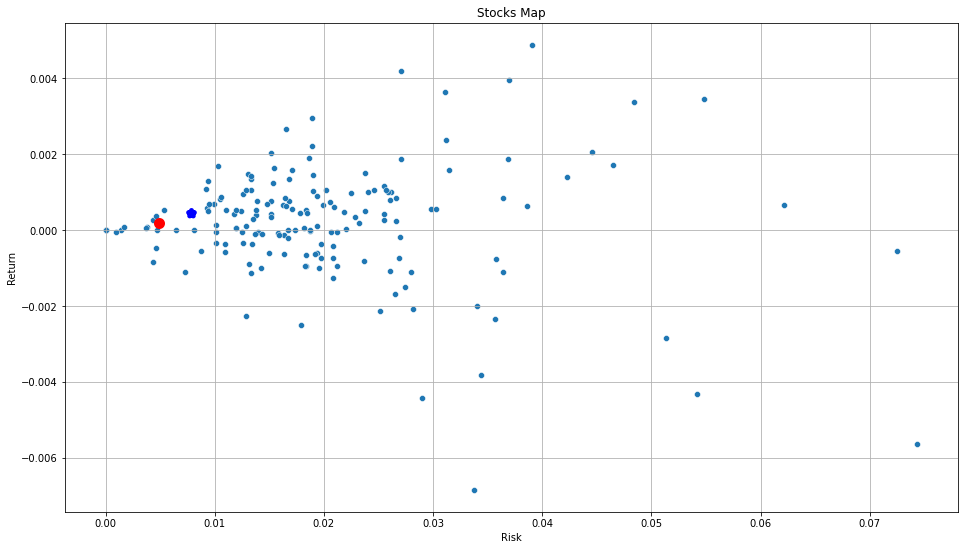

In [ ]:
plot_stocks_map(log_ret, index=True, index_ret=index_logret)

Можем видеть, что портфель с равными долями имеет наименьший риск, но близкую к 0 доходность. Индекс имеет доходность выше, но для него выше и риск.

# Value at Risk

Одним из важнейших показателей, позволяющих оценивать рискованность вложений в актив, является Value at Risk. Подсчитаем его значения для акций, а также для равномерного портфеля и индекса. Подсчитаем теоритические значения из нормального распределения и исторические, основанные на процентной точке распределения. 

$\gamma$ - возьмем **0.95**.

 $\alpha =1-\gamma=0.05$.

In [ ]:
def calc_var(returns, alpha=0.05):
  param_VaR = -(returns.mean() + returns.std()*sps.norm.ppf(alpha))
  hist_VaR = -returns.quantile(alpha)
  
  return param_VaR, hist_VaR

In [ ]:
param_VaR, hist_VaR = calc_var(log_ret)

In [ ]:
stocks_info = pd.DataFrame()
stocks_info['param_VaR'] = param_VaR
stocks_info['hist_VaR'] = hist_VaR
stocks_info['return'] = log_ret.mean()
stocks_info['std'] = log_ret.std()
stocks_info['sharp'] = stocks_info['return']/stocks_info['std']
stocks_info

,param_VaR,hist_VaR,return,std,sharp
A3M.MC,0.035635,0.033874,-0.000873,0.021134,-0.041299
ABG-P.MC,0.076305,0.056706,0.003698,0.048638,0.076028
ABG.MC,0.048410,0.042075,0.000699,0.029856,0.023396
ACS.MC,0.022367,0.025828,0.000274,0.013765,0.019941
ACX.MC,0.027044,0.028366,0.000617,0.016817,0.036706
...,...,...,...,...,...
XEKT.MC,0.028712,0.026487,0.001818,0.018561,0.097951
XPBR.MC,0.036164,0.035390,0.000236,0.022129,0.010655
XTZA.MC,0.051889,0.052859,-0.004402,0.028870,-0.152471
XVALO.MC,0.039007,0.040342,0.000579,0.024067,0.024055


Можем подсчитать лучшие акции по VaR. Найдем актив с наименьшим VaR и сравним с показателями портфеля с равными долями и индексом.

In [ ]:
best_var_index = stocks_info.hist_VaR.sort_values().index[0]
best_var_index

'IBE.MC'

In [ ]:
best_pvar, best_hvar = stocks_info.loc[best_var_index]['param_VaR'], stocks_info.loc[best_var_index]['hist_VaR']

In [ ]:
print(f'Best stock VaR [{best_var_index}]: param {round(best_pvar, 4)}, hist {round(best_hvar, 4)}')

param_VaR, hist_VaR = calc_var(index_logret)
print(f'Index VaR: param {round(param_VaR, 4)}, hist {round(hist_VaR, 4)}')

param_VaR, hist_VaR = calc_var(log_ret.mean(axis=1))
print(f'Portfolio VaR: param {round(param_VaR, 4)}, hist {round(hist_VaR, 4)}')

Best stock VaR [IBE.MC]: param 0.0142, hist 0.0123
Index VaR: param 0.0125, hist 0.0132
Portfolio VaR: param 0.0099, hist 0.0109


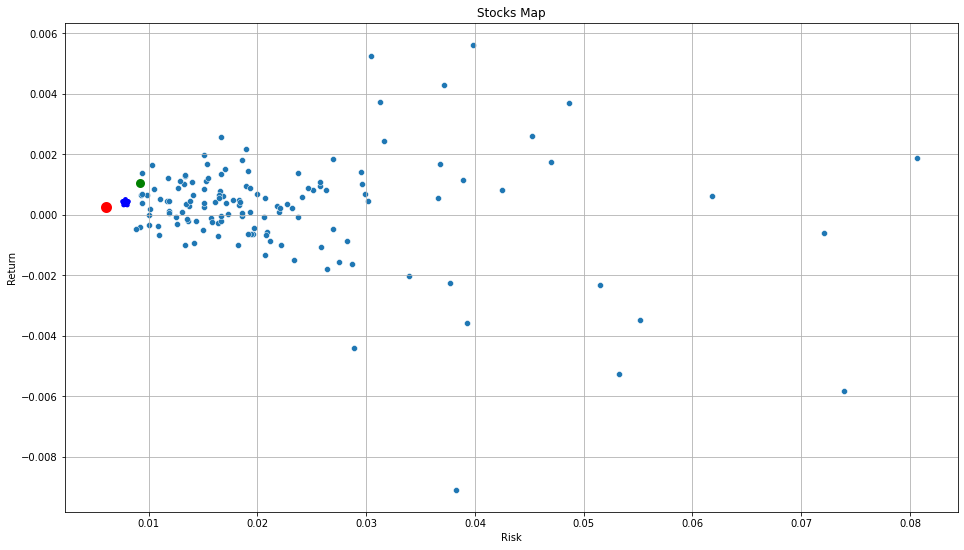

In [ ]:
plot_stocks_map(log_ret, index=True, index_ret=index_logret, special=[best_var_index])

Можем заметить, что исторический и параметрически посчитанные показатели немного отличаются, но где то в тысячных долях и меньше. Наименьшие VaR имеет равномерный портфель. Зеленым отмечен актив, имеющий наименьший VaR.

# Анализ случайности

Выберем активы, имеющие наиболее высокую долю в индексе IBEX 35, который включает 35 крупнейших испанский компаний. Изобразим их зелеными точками на графике.

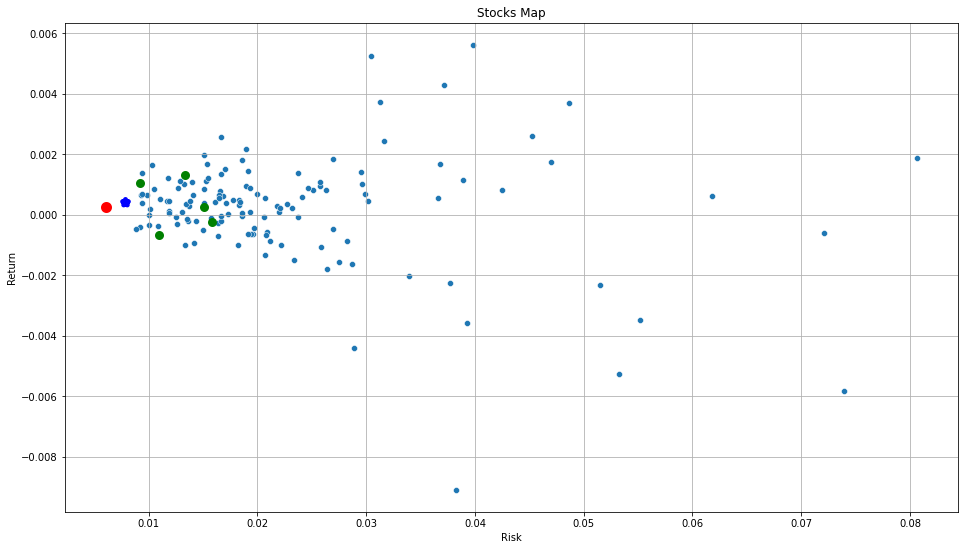

In [ ]:
# selected_sharp = list(stocks_info.sort_values(by='sharp', ascending=False).iloc[:5].index)
selected = ['SAN.MC', 'ITX.MC', 'TEF.MC', 'BBVA.MC', 'IBE.MC']
plot_stocks_map(log_ret, index=True, index_ret=index_logret, special=selected)

## Тесты проверки случайности

Для проверки случайности возьмем 2 критерия: критерий инверсии и критерий автокорреляции. Подсчитываем статистику теста и проверяем, входит ли она в доверительный интервал.

In [ ]:
def getInvCount(arr):
  n = len(arr)
  inv_count = 0

  for i in range(n):
      for j in range(i + 1, n):
          if (arr[i] > arr[j]):

              inv_count += 1

  return inv_count

def inversion_test(X, alpha=0.95):
  n = len(X)
  I = getInvCount(X)
  E = n*(n-1)/4
  D = (2*n**3 + 3*n**2 - 5*n)/72
  left_border, right_border = sps.norm.interval(alpha=alpha,
                               loc=E,
                               scale=D**0.5)
  
  return left_border < I < right_border

In [ ]:
def autocorr_test(X, alpha=0.95):
  n = X.shape[0]
  buf_top = 0
  for i in range(n-1):
    buf_top += X[i]*X[i+1]
  buf_top *= n

  s = 0
  for i in range(n):
    s += X[i]

  buf_top -= s**2 
  buf_top += n*X[0]*X[n-1]

  buf_bot = 0
  s = 0
  for i in range(n):
    s += X[i]**2

  s *= n
  buf_bot += s

  s = 0
  for i in range(n):
    s += X[i]

  buf_bot -= s**2

  stat = buf_top/buf_bot
  E = -1/(n - 1)
  D = n*(n-3)/((n+1)*(n-1)**2)

  left_border, right_border = sps.norm.interval(loc=E, scale=D**0.5, alpha=alpha)

  return left_border < stat < right_border

## Проверка на случайность значимых активов 

In [ ]:
def result(flag):
  if flag:
    return 'Не отвергаем гипотезу о случайности.'
  else:
    return 'Отвергаем гипотезу о случайности.'

def tests(X, ind_list):
  for ind in ind_list:
    print(f'Тикер акции: {ind}')
    print(f'Критерий инверсий: {result(inversion_test(X[ind].dropna()))}')
    print(f'Критерий автокорреляций: {result(autocorr_test(X[ind].dropna()))}')
    print()

In [ ]:
tests(log_ret, selected)

Тикер акции: SAN.MC
Критерий инверсий: Не отвергаем гипотезу о случайности.
Критерий автокорреляций: Отвергаем гипотезу о случайности.

Тикер акции: ITX.MC
Критерий инверсий: Не отвергаем гипотезу о случайности.
Критерий автокорреляций: Не отвергаем гипотезу о случайности.

Тикер акции: TEF.MC
Критерий инверсий: Не отвергаем гипотезу о случайности.
Критерий автокорреляций: Не отвергаем гипотезу о случайности.

Тикер акции: IBE.MC
Критерий инверсий: Не отвергаем гипотезу о случайности.
Критерий автокорреляций: Не отвергаем гипотезу о случайности.



Можем видеть, что критерии определили доходности почти всех выбранных акций как белый шум. Критерий автокорреляций не сработал для SAN.MC.

In [ ]:
tests(df_volume, selected)

Тикер акции: SAN.MC
Критерий инверсий: Не отвергаем гипотезу о случайности.
Критерий автокорреляций: Отвергаем гипотезу о случайности.

Тикер акции: ITX.MC
Критерий инверсий: Не отвергаем гипотезу о случайности.
Критерий автокорреляций: Отвергаем гипотезу о случайности.

Тикер акции: TEF.MC
Критерий инверсий: Отвергаем гипотезу о случайности.
Критерий автокорреляций: Отвергаем гипотезу о случайности.

Тикер акции: IBE.MC
Критерий инверсий: Не отвергаем гипотезу о случайности.
Критерий автокорреляций: Отвергаем гипотезу о случайности.



Можем видеть, что критерий корреляции нашел некоторые зависимости между подряд идущими элементами, что может говорить о том, что объемы продаж распределены не совсем случайно.

# Анализ активов из разных секторов

Возьмем те же активы, что и использовали в предыдущем эксперименте, и проверим их производственный сектор.

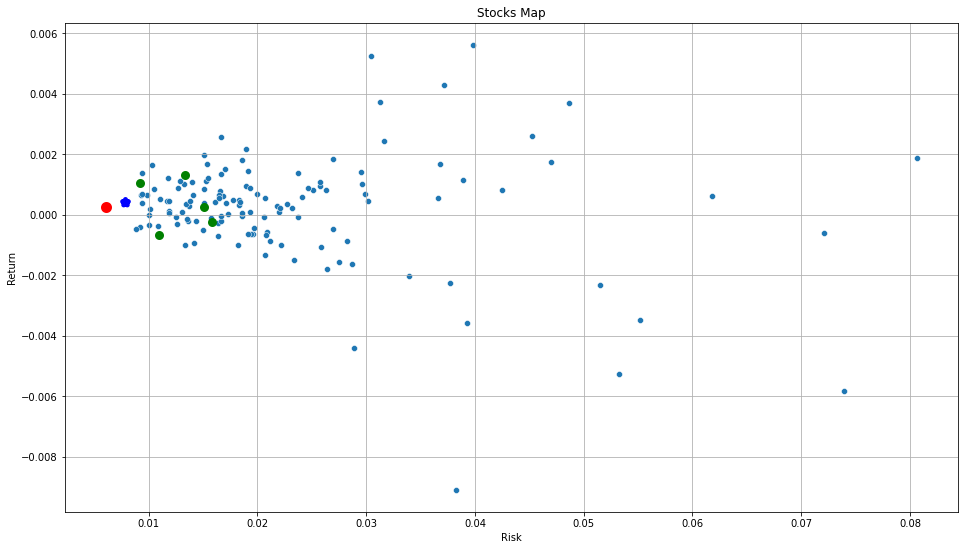

In [ ]:
plot_stocks_map(log_ret, index=True, index_ret=index_logret, special=selected)

In [ ]:
required_tickers = tickers.set_index('Ticker').loc[selected]
required_tickers

,Category
Ticker,
SAN.MC,Money Center Banks
ITX.MC,Apparel Stores
TEF.MC,Wireless Communications
BBVA.MC,Money Center Banks
IBE.MC,Diversified Utilities


Можно видеть, что все компании находятся в разных категориях, кроме SAN.MC и BBVA.MC. Уберем из рассмотрения BBVA.MC.

In [ ]:
selected = ['SAN.MC', 'ITX.MC', 'TEF.MC', 'IBE.MC']

Прежде всего, проанализируем гистограмму доходностей выбранных акций. Можно видеть куполообразность, как у нормального распределения. Но этого недостаточно, чтобы однозначно ответить, являются ли доходности распределенными нормально (далее проведем тесты и построим QQ-plot).

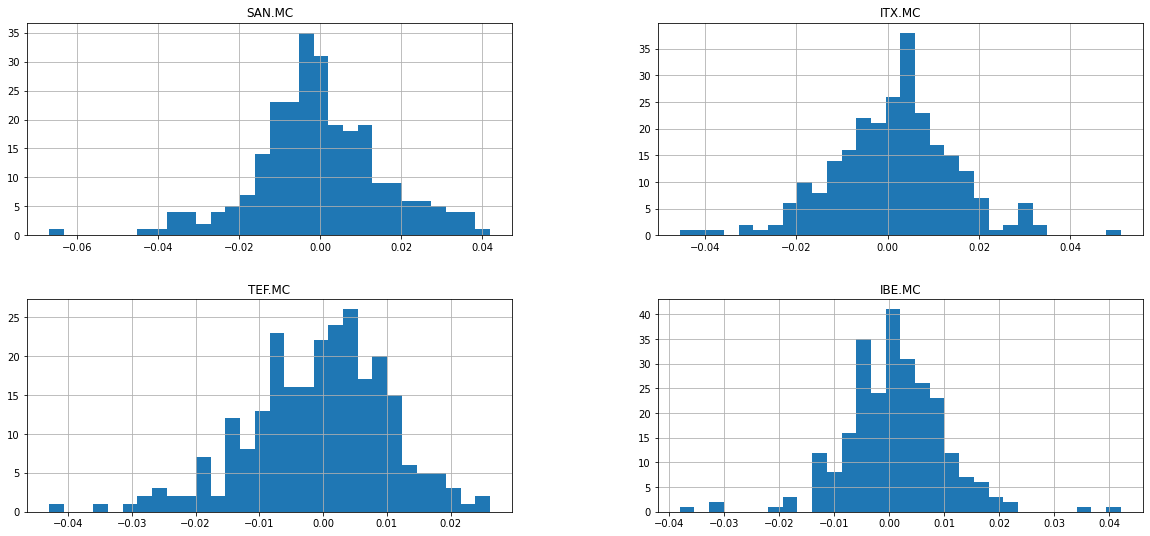

In [ ]:
log_ret[selected].hist(figsize=(20, 9), bins=30);

Распределение объемов продаж не похоже на нормальное. Видим, что большая часть наблюдений сконцентрирована ближе к левому краю графиков.

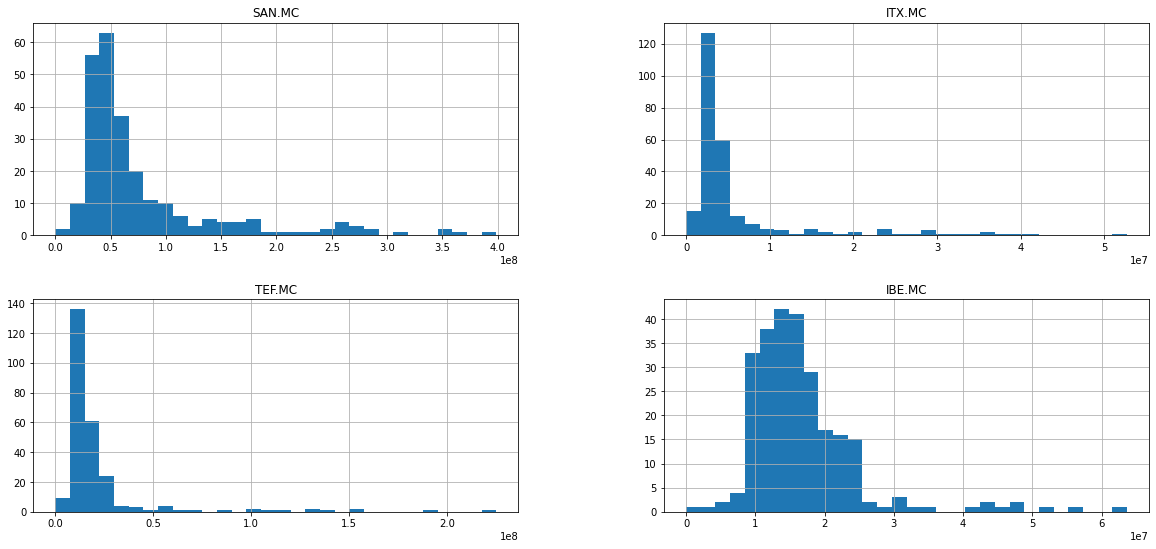

In [ ]:
df_volume[selected].hist(figsize=(20, 9), bins=30);

Для тестирования распределения на нормальность используем тест Шапиро-Вилк'а.

In [ ]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

for ind in selected:
  stat, p = shapiro(log_ret[ind].dropna())
  print(ind,'Statistics=%.3f, p=%.3f' % (stat, p))

SAN.MC Statistics=0.982, p=0.003
ITX.MC Statistics=0.987, p=0.021
TEF.MC Statistics=0.985, p=0.007
IBE.MC Statistics=0.959, p=0.000


pvalue < 0.05 для всех акций, что говорит нам о том, что их распределение не распределено нормально.

Проанализируем QQplot графики для данных активов.

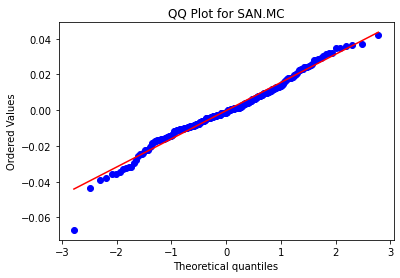

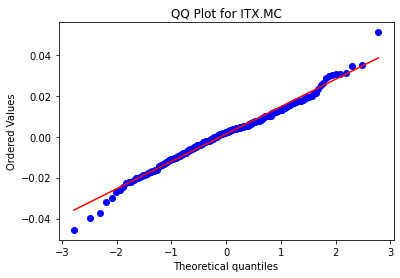

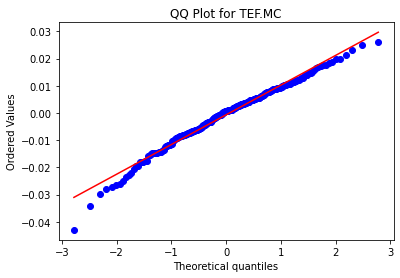

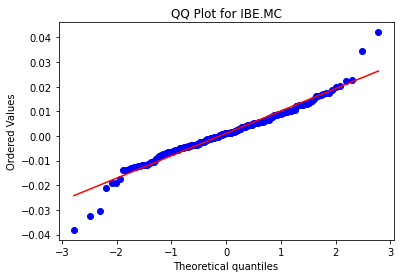

In [ ]:
for ind in selected:
  sps.probplot(log_ret[ind], dist="norm", plot=plt)
  plt.title(f'QQ Plot for {ind}')
  plt.show()

Графики тоже нам говорят о том, что есть отклонения от нормального распределения. 

# Анализ зависимостей

In [ ]:
from scipy.stats import spearmanr

Теперь проанализируем зависимости между активами разных и одних скторов, а также зависимость между объемом продаж и доходностью.

In [ ]:
tickers.groupby('Category').agg('count').sort_values(ascending=False, by='Ticker').head(8)

,Ticker
Category,
General Contractors,9
Property Management,7
Biotechnology,5
Paper & Paper Products,5
Money Center Banks,4
Diversified Utilities,4
Steel & Iron,4
Diversified Machinery,4


In [ ]:
tickers[(tickers['Category'] == 'Diversified Machinery') | (tickers['Category'] == 'Money Center Banks')].groupby(['Category', 'Ticker']).count()

Empty DataFrame
Columns: []
Index: [(Diversified Machinery, CAF.MC), (Diversified Machinery, FDR.MC), (Diversified Machinery, NEA.MC), (Diversified Machinery, ZOT.MC), (Money Center Banks, BBVA.MC), (Money Center Banks, BKT.MC), (Money Center Banks, SAB.MC), (Money Center Banks, SAN.MC)]

Мы выбрали два сектора: Diversified Machinery и Money Center Banks, по три из актива каждого сектора.

In [ ]:
sector1 =['CAF.MC', 'NEA.MC', 'ZOT.MC']
sector2 = ['BBVA.MC', 'SAN.MC', 'SAB.MC']

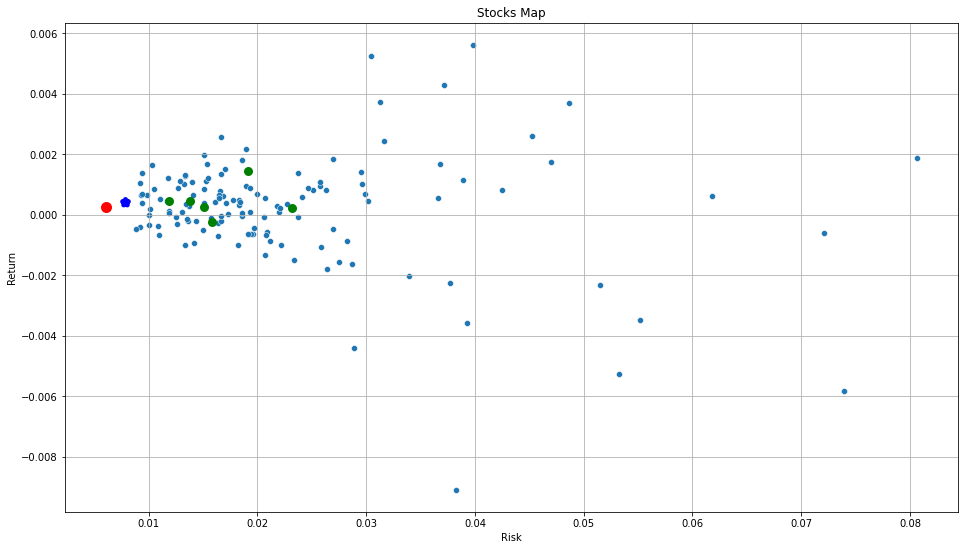

In [ ]:
plot_stocks_map(log_ret, index=True, index_ret=index_logret, special=sector1 + sector2)

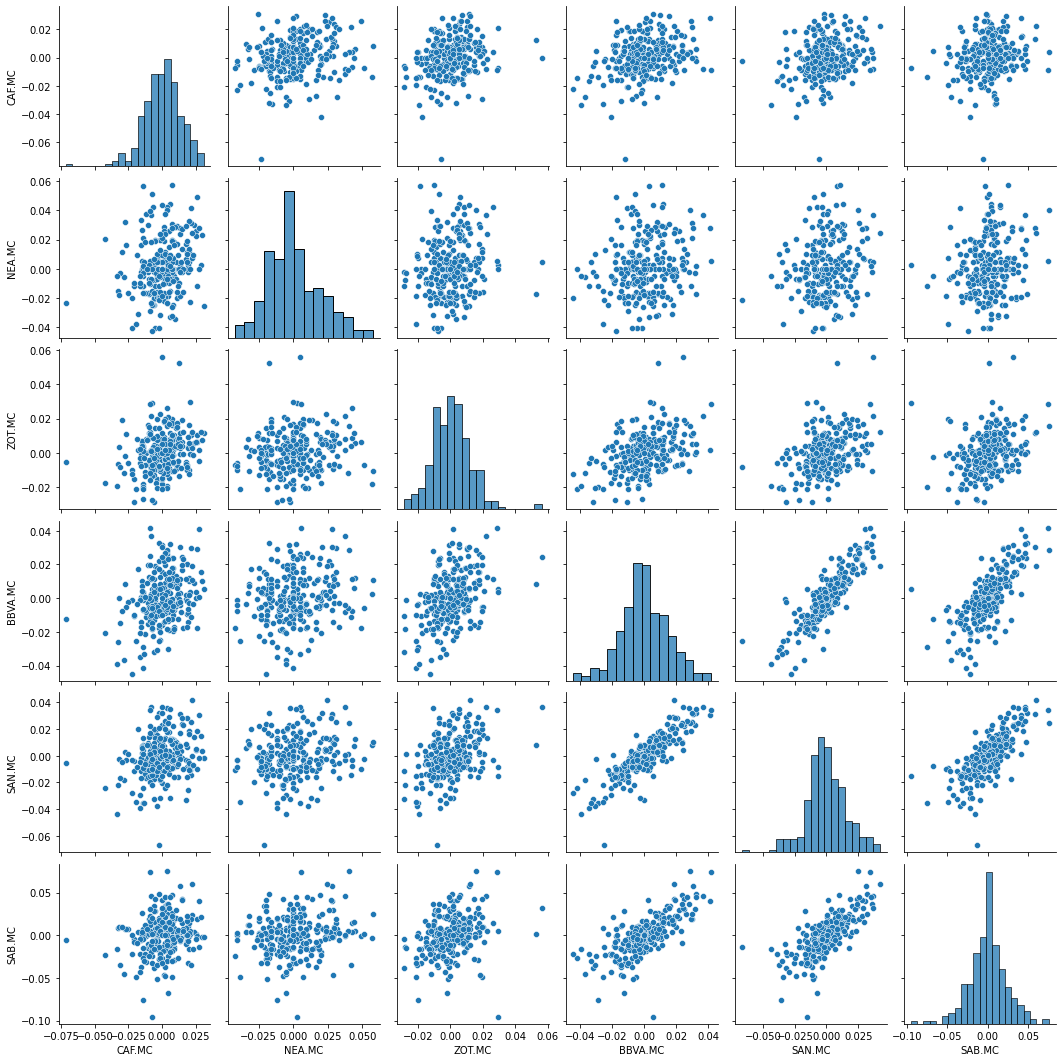

In [ ]:
sns.pairplot(log_ret[sector1 + sector2]);

Можем видеть, что есть некоторая линейная зависимость между доходностями в секторе 2 (об этом говорит наклоненное овалообразное скопление точек). Между активами из другого сектора такой явной зависимости не наблюдается.

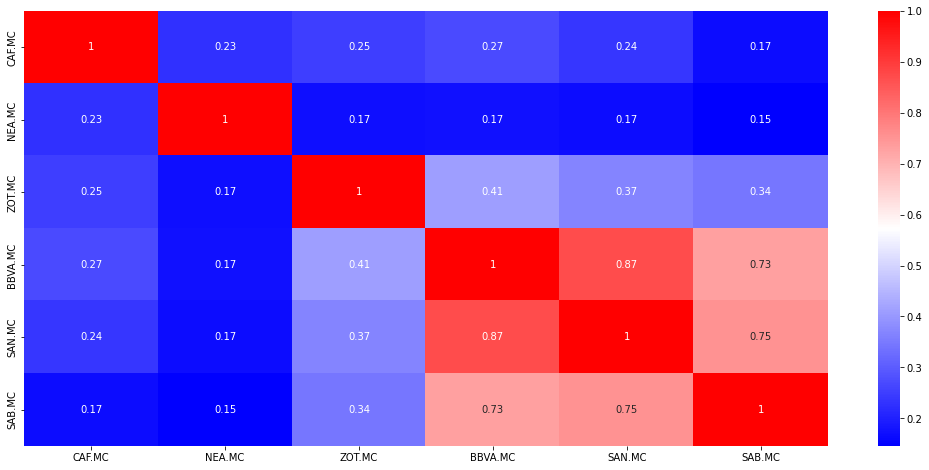

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(log_ret[sector1 + sector2].corr(method='spearman'),cmap='bwr',annot=True);

Корреляционная таблица подтверждает наши предположения: действительно, коэффициенты корреляций между акциями сектора Money Center Banks имею высокие показатели. Кроме того, компания ZOT также показывает некоторую связь с акциями из этого сектора. 

Рассмотрим отдельно каждый сектор.

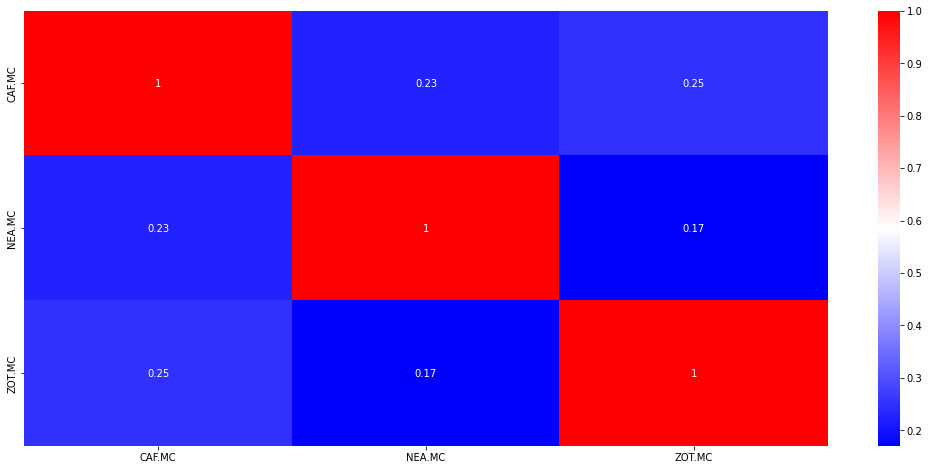

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(log_ret[sector1].corr(method='spearman'),cmap='bwr',annot=True);

In [ ]:
spearmanr(log_ret['NEA.MC'], log_ret['ZOT.MC'])

SpearmanrResult(correlation=0.17031569216381115, pvalue=0.006404707876265309)

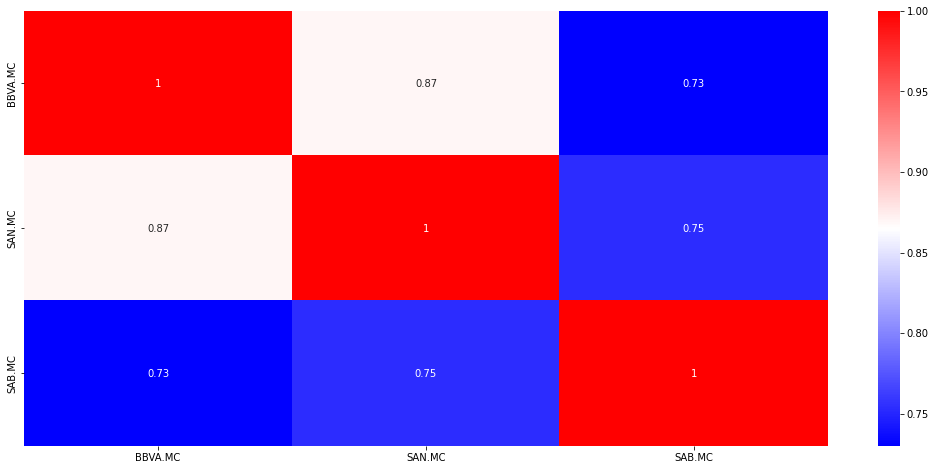

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(log_ret[sector2].corr(method='spearman'),cmap='bwr',annot=True);

In [ ]:
spearmanr(log_ret['BBVA.MC'], log_ret['SAN.MC'])

SpearmanrResult(correlation=0.8702037383850699, pvalue=9.58076573551611e-80)

Теперь возьмем одну из компаний и проанализируем зависимость между объемом продаж и доходностью.



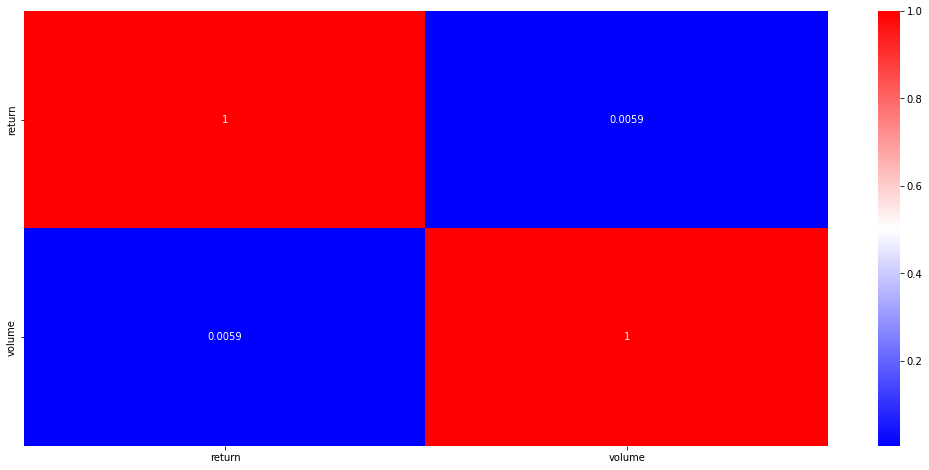

In [ ]:
selected_stock = pd.DataFrame()
selected_stock['return'] = log_ret['BBVA.MC']
selected_stock['volume'] = df_volume['BBVA.MC']

plt.figure(figsize=(18,8))
sns.heatmap(selected_stock.corr(method='spearman'),cmap='bwr',annot=True);

In [ ]:
spearmanr(df_volume['BBVA.MC'].dropna().iloc[1:], log_ret['BBVA.MC'])

SpearmanrResult(correlation=0.00588778186656554, pvalue=0.925459304970564)

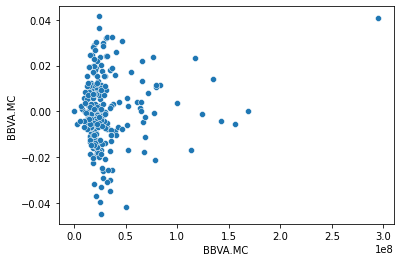

In [ ]:
sns.scatterplot(x=df_volume['BBVA.MC'], y=log_ret['BBVA.MC']);

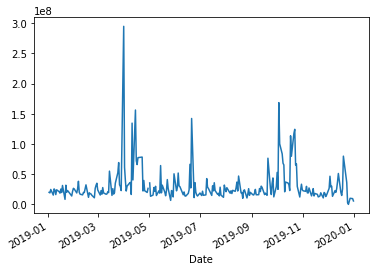

In [ ]:
df_volume['BBVA.MC'].plot();

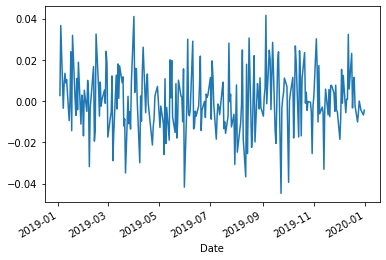

In [ ]:
log_ret['BBVA.MC'].plot();

Можно видеть, что нет значительной корреляции между данными показателями.